# Laporan Proyek Machine Learning - Zefanya Danovanta Tarigan




## Domain Proyek
Domain yang dipilih untuk proyek *machine learning* ini adalah **Kesehatan**, dengan judul **Predictive Analytics : Deteksi Balita Stunting**
- **Latar Belakang :**  
Stunting adalah kondisi terhambatnya pertumbuhan pada anak balita akibat kurang gizi kronis sehingga anak terlibat lebih pendek dari pertumbuhan usianya. Hal tersebut akan berdampak pada perkembangan anak, maka pemantauan pertumbuhan dan perkembang balita sangat penting dilakukan untuk mengetahui hambatan pertumbuhan (growth faltering) sejak dini.
Deteksi dini menjadi salah satu langkah paling penting dalam menangani stunting. Dengan mendeteksi stunting lebih awal, intervensi gizi dan perawatan medis dapat diberikan secara tepat waktu, sehingga risiko jangka panjang dapat diminimalkan. Namun, dalam praktiknya, deteksi stunting sering kali masih bergantung pada metode tradisional yang membutuhkan waktu lebih lama, dan kadang kurang efektif dalam menjangkau populasi yang luas.

## Business Understanding

### Problem Statements
Berdasarkan latar belakang di atas, berikut ini merupakan rincian masalah yang dapat diselesaikan pada proyek ini :
-
-

### Goals
Tujuan dari proyek ini adalah:
-
-

## Data Understanding
Dataset yang digunakan dalam proyek ini adalah kumpulan data berdasarkan rumus z-score penentuan stunting menurut WHO (World Health Organization), yang berfokus pada deteksi stunting pada balita. Dataset ini terdiri dari 121000 baris dan 4 kolom, diataranya :  
1. `Umur (Bulan)` : Mengindikasikan usia balita dalam bulan. Rentang usia ini penting untuk menentukan fase pertumbuhan anak dan membandingkannya dengan standar pertumbuhan yang sehat. (Umur 0 sampai 60 bulan)
2. `Jenis Kelamin` : Terdapat dua kategori dalam kolom ini, **laki-laki** dan **perempuan**.
3. `Tinggi Badan` :Dicatat dalam centimeter, tinggi badan adalah indikator utama untuk menilai pertumbuhan fisik balita.
4. `Status Gizi` : Kolom ini dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius (<-3 SD), 'stunting' menunjukkan kondisi stunting (-3 SD sd <-2 SD), 'normal' mengindikasikan status gizi yang sehat (-2 SD sd +3 SD), dan 'tinggi' (height) menunjukkan pertumbuhan di atas rata-rata (>+3 SD)

## Data Preparation
Teknik yang digunakan dalam penyiapan data (Data Preparation) yaitu:
-
-



### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from google.colab import files
import os
import zipfile

### Menyiapkan Kredensial Kaggle
Dataset yang akan dipakai dalam proyek ini diambil dari platform Kaggle. Maka dari itu, sebelum dapat mengunduh data, harus mengunggah kredensial berupa file JSON yang dapat di-generate melalui profil akun Kaggle.

In [2]:
# Upload kaggle.json
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [3]:
# Ubah permission file
!chmod 600 /content/kaggle.json

In [4]:
# Setup Kaggle environment
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [5]:
# Download dataset
!kaggle datasets download -d rendiputra/stunting-balita-detection-121k-rows

Dataset URL: https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows
License(s): MIT
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 111MB/s]


In [6]:
# melakukan ekstraksi pada file zip
local_zip = 'stunting-balita-detection-121k-rows.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/stunting-balita-detection-121k-rows/')
zip_ref.close()

In [7]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm stunting-balita-detection-121k-rows.zip

### Data Understanding
Langkah pertama untuk memahami data yaitu dengan melihat isi dari direktori dataset yang telah diunduh



In [8]:
# Cek isi direktori dataset
os.listdir('/content/stunting-balita-detection-121k-rows')

['data_balita.csv']

Dari keluaran di atas, dapat diketahui bahwa ada dua berkas data, diantaranya adalah dataset utama dan berkas lainnya adalah merupakan dokumentasi.



Untuk Melihat data dokumentasinya dengan menggunakan *pandas*

In [9]:
# Cek dokumentasi dataset
data = pd.read_csv('/content/stunting-balita-detection-121k-rows/data_balita.csv')
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


Dari dataframe di atas kita dapat melihat bahwa pada dataset ini terdapat 4 kolom. Diantaranya:
1. `Umur (Bulan)` : Mengindikasikan usia balita dalam bulan. Rentang usia ini penting untuk menentukan fase pertumbuhan anak dan membandingkannya dengan standar pertumbuhan yang sehat. (Umur 0 sampai 60 bulan)
2. `Jenis Kelamin` : Terdapat dua kategori dalam kolom ini, **laki-laki** dan **perempuan**.
3. `Tinggi Badan` :Dicatat dalam centimeter, tinggi badan adalah indikator utama untuk menilai pertumbuhan fisik balita.
4. `Status Gizi` : Kolom ini dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius (<-3 SD), 'stunting' menunjukkan kondisi stunting (-3 SD sd <-2 SD), 'normal' mengindikasikan status gizi yang sehat (-2 SD sd +3 SD), dan 'tinggi' (height) menunjukkan pertumbuhan di atas rata-rata (>+3 SD)

In [11]:
data.shape

(120999, 4)

In [12]:
data.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [13]:
data.info()
print("Jumlah Duplikasi : ", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB
Jumlah Duplikasi :  81574


Dari Output diatas, kita dapat mengetahui Banyak nilai yang ada pada masing masing kolom beserta tipe data kolom tersebut, lalu terdapat juga nilai yang sama (mengalami duplikasi) sebanyak 81574

In [14]:
data.isnull().sum()

,0
Umur (bulan),0
Jenis Kelamin,0
Tinggi Badan (cm),0
Status Gizi,0


Dari output diatas, dapat diambil kesimpulan bahwa masing masing kolom tidak mempuyai nilai yang kosong (Missing Value)

In [15]:
data = data.drop_duplicates()

### Visualisasi Data dan analisis eksplorasi data (EDA)


In [16]:
numerical_columns = data.select_dtypes(include=["int64","float64"]).columns
category_columns = data.select_dtypes(include= ["object"]).columns

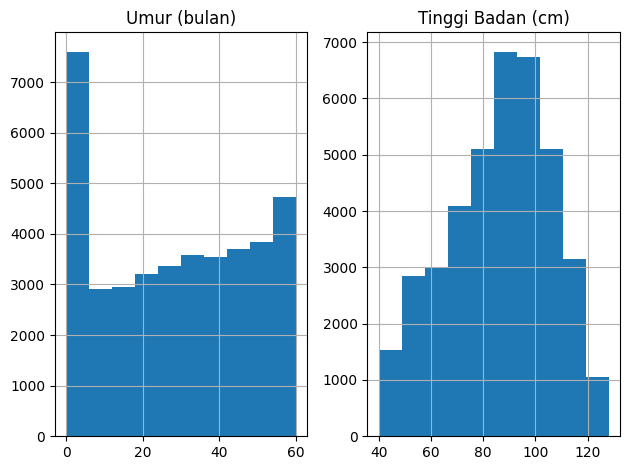

In [17]:
data[numerical_columns].hist(bins=10)
plt.tight_layout()
plt.show()

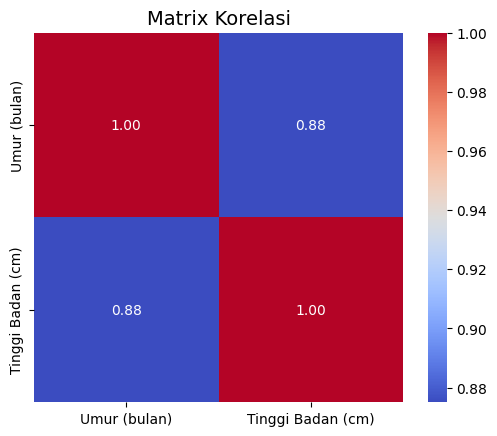

In [18]:
plt.figure()
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot= True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Matrix Korelasi", fontsize=14)
plt.show()

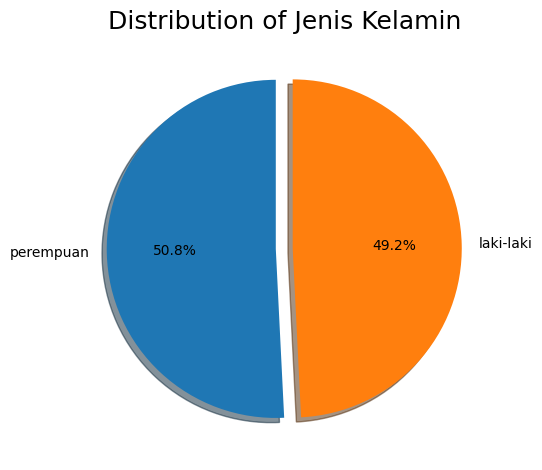

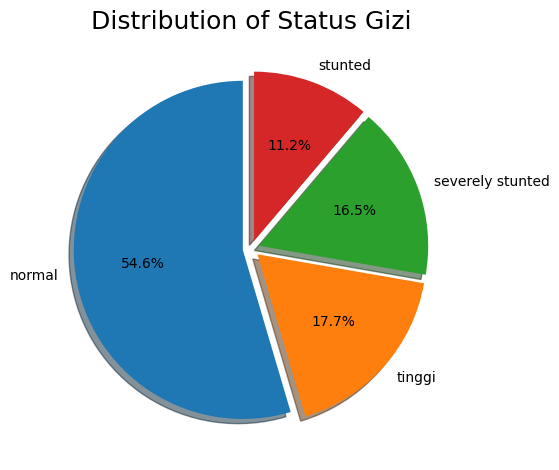

In [19]:
for col in category_columns:
    plt.figure()
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05] * len(data[col].value_counts()),
        shadow=True,
    )
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

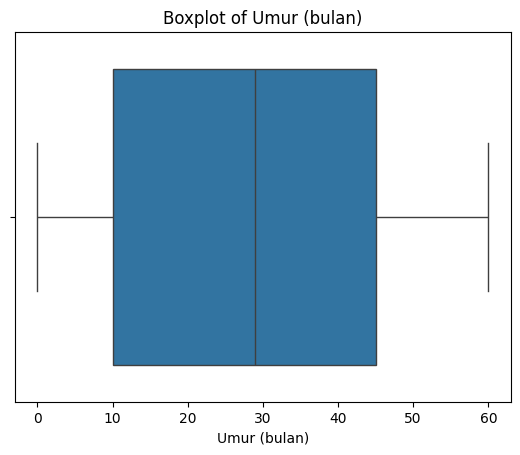

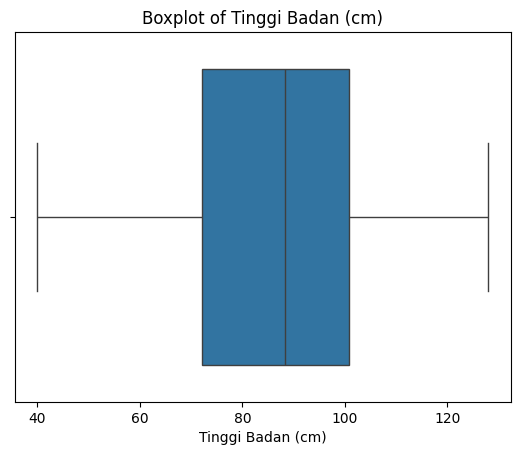

In [20]:
for col in numerical_columns:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}" )
    plt.show()

### Data Preparation

#### Menangani Duplikasi
Data tersebut mempunyai nilai duplikasi sebanyak 81574, maka dari itu perlu menghapus nilai nilai duplikat tersebut dengan cara `.drop_duplicates()`

In [21]:
data = data.drop_duplicates()

Untuk memastikan apakah data tersebut sudah tidak ada lagi duplikasi, maka kita perlu mengecek kembali dengan cara `.duplicated().sum()`

In [22]:
data.info()
print("Jumlah Duplikasi : ", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 39425 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       39425 non-null  int64  
 1   Jenis Kelamin      39425 non-null  object 
 2   Tinggi Badan (cm)  39425 non-null  float64
 3   Status Gizi        39425 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB
Jumlah Duplikasi :  0


In [23]:
data.shape

(39425, 4)

#### Label Encoder
Melakukan Encoding menggunakan Label Encode dari library sklearn.preprocessing pada kolom `Status Gizi` lalu di pindahkan ke dalam kolom `Gizi_Encode` dan kolom sebelumya akan dihapus

In [24]:
label_encoder = LabelEncoder()
data["Gizi_Encode"] = label_encoder.fit_transform(data["Status Gizi"])

In [25]:
data = data.drop("Status Gizi", axis=1)

#### One-Hot Encoding
Melakukan One-Hot Encoding pada variabel bertipe data category yang tersisa yaitu `Jenis Kelamin`

In [26]:
data = pd.get_dummies(data)
data.head()

,Umur (bulan),Tinggi Badan (cm),Gizi_Encode,Jenis Kelamin_laki-laki,Jenis Kelamin_perempuan
0,0,44.591973,2,True,False
1,0,56.705203,3,True,False
2,0,46.863358,0,True,False
3,0,47.508026,0,True,False
4,0,42.743494,1,True,False


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39425 entries, 0 to 120993
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Umur (bulan)             39425 non-null  int64  
 1   Tinggi Badan (cm)        39425 non-null  float64
 2   Gizi_Encode              39425 non-null  int64  
 3   Jenis Kelamin_laki-laki  39425 non-null  bool   
 4   Jenis Kelamin_perempuan  39425 non-null  bool   
dtypes: bool(2), float64(1), int64(2)
memory usage: 1.3 MB


#### Split Data
Membagi dataset menjadi data latih dan data uji menggunakan bantuan **train_test_split**. Pembagian dataset ini bertujuan agar nantinya dapat digunakan untuk melatih dan mengevaluasi kinerja model. Pada proyek ini, 80% dataset digunakan untuk melatih model, dan 20% sisanya digunakan untuk mengevaluasi model.

In [28]:
X = data.drop(["Gizi_Encode"], axis=1)
y = data["Gizi_Encode"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
# Memberikan Informasi dari banyak data yang telah dibagi
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 39425
Total of sample in train dataset: 31540
Total of sample in test dataset: 7885


#### Normalisasi Data
Menggunakan **MinMaxScaler**, yaitu teknik normalisasi yang mentransformasikan nilai fitur atau variabel ke dalam rentang [0,1] yang berarti bahwa nilai minimum dan maksimum dari fitur/variabel masing-masing adalah 0 dan 1

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling
Pada tahap modeling ini dibuat beberapa model dengan algoritma yang berbeda-beda. Pada proyek ini akan dibuat 4 model, diantaranya yaitu menggunakan KNN, Random Forest, SVM, dan Naive Bayes

In [31]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes'])

#### KNN (K-Nearest Neighbor)

In [32]:
knn = KNeighborsClassifier()

# Mencoba nilai n_neighbors dari 1 hingga 20
param_grid = {'n_neighbors': range(2, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Best accuracy on training set:", grid_search.best_score_)

Best n_neighbors: 3
Best accuracy on training set: 0.9883956880152187


In [33]:
best_knn = grid_search.best_estimator_
knn_pred = best_knn.predict(X_test)

In [34]:
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

#### Random Forest

In [52]:
# Buat model prediksi dengan Random Forest
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Lakukan prediksi dengan model Random Forest
rf_pred = model_rf.predict(X_test)

In [56]:
# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)

#### Support Vector Classifier

In [57]:
# Buat model prediksi dengan Support Vector Machine Classifier
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [58]:
# Lakukan prediksi dengan model SVM Classifier
svc_pred = model_svc.predict(X_test)

In [59]:
# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svc_pred)

#### Naive Bayes

In [60]:
# Buat model prediksi dengan Bernoulli Naive Bayes
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB()

In [61]:
# Lakukan prediksi dengan model Naive Bayes
nb_pred = model_nb.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

### Evaluation
Setelah mendapatkan beberapa model, maka dapat dibandingkan akurasi prediksinya untuk mendapatkan model dengan kinerja yang terbaik. Agar lebih mudah dapat menggunakan visualisasi seperti berikut.

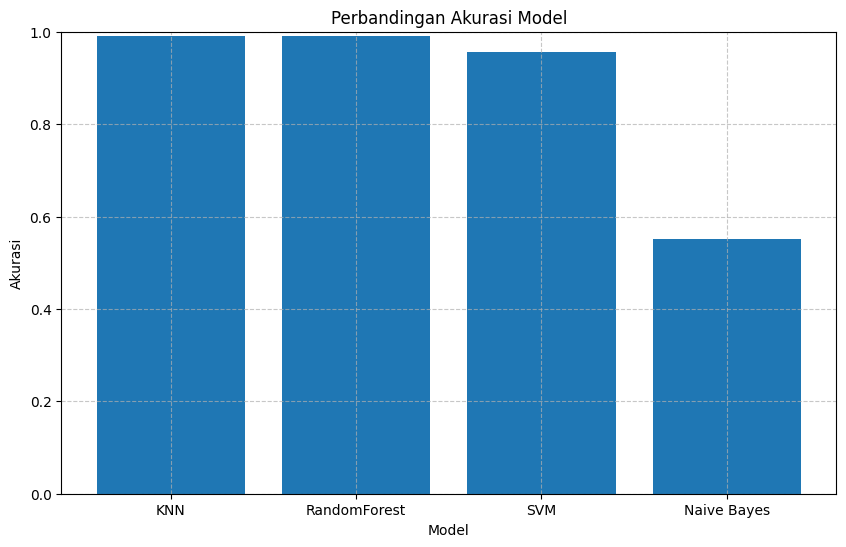

In [62]:
# Menampilkan perbandingan akurasi beberapa model yang telah dibuat
plt.figure(figsize=(10, 6))
plt.bar(models.columns, models.loc['accuracy_score'].astype(float))
plt.title("Perbandingan Akurasi Model")
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [63]:
models

,KNN,RandomForest,SVM,Naive Bayes
accuracy_score,0.990615,0.990996,0.956246,0.550285


In [64]:
best_model = models.loc['accuracy_score'].astype(float).idxmax()
print(f"Model terbaik adalah {best_model} dengan akurasi {models.loc['accuracy_score', best_model]}")

Model terbaik adalah RandomForest dengan akurasi 0.9909955611921369
